FIAP - Redes Neurais Artificiais, Deep Learning e Algoritmos Genéticos 

# Aula 08 - Redes Perceptron com Sklearn - Parte 2

Vamos utilizar o [Iris dataset](https://archive.ics.uci.edu/ml/datasets/iris) para modelar Redes Neruais baseadas no Perceptron

In [9]:
# Apenas para evitar warnings 
import warnings

warnings.filterwarnings('ignore')

# Bibliotecas de Data Science
import pandas as pd
import seaborn as sns

# Separação dos dados
from sklearn.model_selection import train_test_split

# Padronização dos dados
from sklearn.preprocessing import StandardScaler

# Modelos a serem utilizados
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Métricas de avaliação
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

## Case 1: classificação (Iris Dataset) 

### Leitura do dataset e preparação do Pandas

In [10]:
from sklearn.datasets import load_iris

iris = load_iris()

# Transformando em Dataframe Pandas: 
#   - os dados são iris.data
#   - as colunas são os nomes das características
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data["class"] = iris.target  # as classes são os targets do dataset

data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Dividindo os dados em TREINO e TESTE

In [11]:
X = data.drop(columns=["class"])  # As features são todos os dados, exceto os labels
y = data["class"]  # Os labels são as classes que queremos classificar automaticamente

# Divisão de treino e teste, sendo 20% das amostras para teste
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

### Padronização dos dados

In [48]:
x_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [47]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_train_scaled

array([[-1.47393679,  1.20365799, -1.56253475, -1.31260282],
       [-0.13307079,  2.99237573, -1.27600637, -1.04563275],
       [ 1.08589829,  0.08570939,  0.38585821,  0.28921757],
       [-1.23014297,  0.75647855, -1.2187007 , -1.31260282],
       [-1.7177306 ,  0.30929911, -1.39061772, -1.31260282],
       [ 0.59831066, -1.25582892,  0.72969227,  0.95664273],
       [ 0.72020757,  0.30929911,  0.44316389,  0.4227026 ],
       [-0.74255534,  0.98006827, -1.27600637, -1.31260282],
       [-0.98634915,  1.20365799, -1.33331205, -1.31260282],
       [-0.74255534,  2.32160658, -1.27600637, -1.44608785],
       [-0.01117388, -0.80864948,  0.78699794,  0.95664273],
       [ 0.23261993,  0.75647855,  0.44316389,  0.55618763],
       [ 1.08589829,  0.08570939,  0.55777524,  0.4227026 ],
       [-0.49876152,  1.87442714, -1.39061772, -1.04563275],
       [-0.49876152,  1.4272477 , -1.27600637, -1.31260282],
       [-0.37686461, -1.47941864, -0.01528151, -0.24472256],
       [ 0.59831066, -0.

### Uso dos modelos 

Perceptron e Multi-layer Perceptron (MLP).

In [61]:
def model_creator(x_train, x_test, y_train, y_test):
    perceptron = Perceptron(random_state=42)
    perceptron.fit(x_train, y_train)

    y_pred = perceptron.predict(x_test)

    print(f"Accuracy Perceptron: {round(accuracy_score(y_test, y_pred), 2)}")

    plot_confusion_matrix(perceptron, x_test, y_test, cmap="Blues");

    mlp = MLPClassifier(hidden_layer_sizes=(2,),
                        random_state=1,
                        solver="lbfgs")
    mlp.fit(x_train, y_train)

    y_pred = mlp.predict(x_test)

    print(f"Accuracy MultiPerceptron: {round(accuracy_score(y_test, y_pred), 2)}")

    plot_confusion_matrix(mlp, x_test, y_test, cmap="Blues");

Accuracy Perceptron: 0.63
Accuracy MultiPerceptron: 0.97


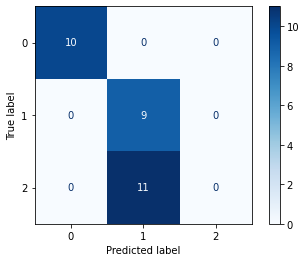

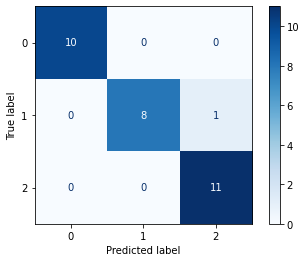

In [64]:
model_creator(x_train, x_test, y_train, y_test)

Accuracy Perceptron: 0.93
Accuracy MultiPerceptron: 1.0


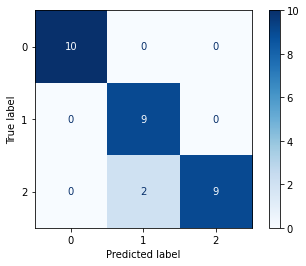

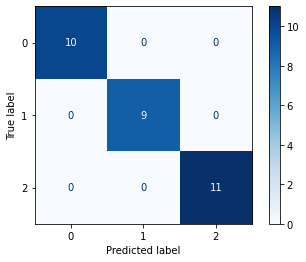

In [65]:
model_creator(x_train_scaled, x_test_scaled, y_train, y_test)

## Case 2: regressão (Boston house-prices dataset) 

### Leitura do dataset e preparação do Pandas

In [66]:
from sklearn.datasets import load_boston

# Transformando em Dataframe Pandas: 
boston = load_boston()
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data["label"] = boston.target

data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,label
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


### Dividindo os dados em TREINO e TESTE

In [67]:
X = data.drop(columns=["label"])  # As features são todos os dados, exceto os labels
y = data["label"]  # Os labels são os valores que queremos prever automaticamente

# Divisão de treino e teste, sendo 20% das amostras para teste
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

### Definição do modelo 
Criação de uma função para reaproveitar o código.

In [95]:
def novo_modelo(x_train, x_test, y_train, y_test):
    mlp = MLPRegressor(hidden_layer_sizes=5,
                       solver="lbfgs",
                       random_state=1,
                       max_iter=50)

    mlp.fit(x_train, y_train)
    y_pred = mlp.predict(x_test)

    print(f"MSE: {round(mean_squared_error(y_test, y_pred), 2)}")
    print(f"MAS: {round(mean_absolute_error(y_test, y_pred), 2)}")

#### Rodando SEM padronizar os dados

In [96]:
novo_modelo(x_train, x_test, y_train, y_test)

MSE: 75.05
MAS: 6.26


#### Rodando COM dados padronizados

In [97]:
# Padroniza os dados
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled

array([[ 1.28770177, -0.50032012,  1.03323679, ...,  0.84534281,
        -0.07433689,  1.75350503],
       [-0.33638447, -0.50032012, -0.41315956, ...,  1.20474139,
         0.4301838 , -0.5614742 ],
       [-0.40325332,  1.01327135, -0.71521823, ..., -0.63717631,
         0.06529747, -0.65159505],
       ...,
       [-0.40547014,  2.95931752, -1.30336132, ..., -0.59225149,
         0.37901005, -0.91069248],
       [ 0.85189733, -0.50032012,  1.03323679, ...,  0.84534281,
        -2.69458597,  1.52257036],
       [-0.38135592, -0.50032012, -0.35216694, ...,  1.15981657,
        -3.12158061, -0.25731635]])

In [98]:
# Treina e avalia o modelo nos dados padronizados 
novo_modelo(x_train_scaled, x_test_scaled, y_train, y_test)

MSE: 11.1
MAS: 2.33
